<a href="https://colab.research.google.com/github/firdoussadafmohdismail/SadafGauhar/blob/main/PHDconfPAPER2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install dlib opencv-python imutils

In [3]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2


--2026-02-07 05:58:58--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2026-02-07 05:58:59--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  17.0MB/s    in 4.1s    

2026-02-07 05:59:03 (14.8 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



Image exists: True
Predictor exists: True


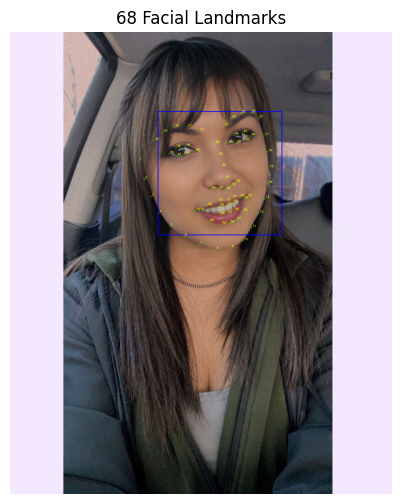

✅ Output saved at: /content/output_68_landmarks2.jpg


In [14]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
import os

# =========================
# CORRECT PATHS
# =========================
INPUT_IMAGE  = "/content/bad_973.jpg"
OUTPUT_IMAGE = "/content/output_68_landmarks2.jpg"
PREDICTOR    = "/content/shape_predictor_68_face_landmarks.dat"
UPSAMPLE     = 1

# =========================
# Safety check
# =========================
print("Image exists:", os.path.exists(INPUT_IMAGE))
print("Predictor exists:", os.path.exists(PREDICTOR))

# =========================
# Helper functions
# =========================
def shape_to_np(shape):
    coords = np.zeros((68, 2), dtype=int)
    for i in range(68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    return coords

def draw_landmarks(image, points):
    for i, (x, y) in enumerate(points):
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
        cv2.putText(
            image,
            str(i + 1),
            (x + 3, y - 3),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.35,
            (0, 255, 255),
            1,
            cv2.LINE_AA
        )
    return image

# =========================
# Load models
# =========================
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(PREDICTOR)

# =========================
# Read image
# =========================
image_bgr = cv2.imread(INPUT_IMAGE)
if image_bgr is None:
    raise ValueError("❌ OpenCV still cannot read the image")

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# =========================
# Detect face
# =========================
faces = detector(image_rgb, UPSAMPLE)

if len(faces) == 0:
    print("⚠️ No face detected")
else:
    face = max(faces, key=lambda r: r.width() * r.height())
    cv2.rectangle(
        image_bgr,
        (face.left(), face.top()),
        (face.right(), face.bottom()),
        (255, 0, 0),
        2
    )

    shape = predictor(image_rgb, face)
    landmarks = shape_to_np(shape)
    image_bgr = draw_landmarks(image_bgr, landmarks)

# =========================
# Save + display
# =========================
cv2.imwrite(OUTPUT_IMAGE, image_bgr)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("68 Facial Landmarks")
plt.show()

print(f"✅ Output saved at: {OUTPUT_IMAGE}")


In [12]:
from google.colab import files
uploaded = files.upload()

Saving bad_973.jpg to bad_973.jpg


In [6]:
!ls

bad_971.jpg  sample_data  shape_predictor_68_face_landmarks.dat


In [13]:
!find /content -maxdepth 2 -type f


/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/default_configs.db
/content/.config/.last_opt_in_prompt.yaml
/content/.config/active_config
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/config_sentinel
/content/.config/.last_survey_prompt.yaml
/content/bad_973.jpg
/content/CCO (997).jpg
/content/shape_predictor_68_face_landmarks.dat
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
